In [2]:
from pathlib import Path

import re

import pandas as pd
import numpy as np

import biopsykit as bp
import biopsykit.saliva as saliva

import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib widget
#%load_ext autoreload
#%autoreload 2

In [3]:
path = Path("../example_data")

## Load Condition List

In [4]:
condition_list = bp.io.load_subject_condition_list(path.joinpath("condition_list.csv"), return_dict=False)
condition_list.head()

,condition
subject,
01,Intervention
02,Intervention
03,Control
04,Intervention
05,Intervention


## Load Data

### Option 0: Load BioPsyKit example data 

In [6]:
df_cort = bp.example_data.get_saliva_example()

### Option 1: Use BioPsyKit to load saliva data in 'plate' format

Load Data into pandas Dataframe

In [8]:
cort_path = path.joinpath("cortisol_sample_plate.xlsx")
df_cort = saliva.io.load_saliva_plate(file_path=cort_path, biomarker_type="cortisol", sample_id_col="sample ID", data_col="cortisol (nmol/l)", condition_list=condition_list)

Save Dataframe as csv (in standardized format)

In [9]:
saliva.io.save_saliva(path.joinpath("cortisol_sample.csv"), df_cort)

### Option 2: Use BioPsyKit to load saliva data that's already in the 'correct' format

In [10]:
cort_path = path.joinpath("cortisol_sample.csv")
df_cort = saliva.io.load_saliva(file_path=cort_path, biomarker_type="cortisol")
df_cort.head()

cortisol
subject condition    sample          
01      Intervention 0        6.98890
                     1        7.03320
                     2        5.77670
                     3        5.25790
                     4        5.00795

### Exclude subjects
Calling `exclude_subjects()` will exclude the passed subjects in the passed lists. 

In [15]:
bp.utils.exclude_subjects(['01', '02'], condition_list=condition_list, cortisol=df_cort)

{'condition_list':             condition
 subject              
 03            Control
 04       Intervention
 05       Intervention
 06            Control
 07       Intervention
 08            Control
 09            Control
 10       Intervention
 11            Control
 15       Intervention
 16       Intervention
 17            Control
 18       Intervention
 19            Control
 20       Intervention
 21            Control
 22            Control
 24            Control
 25       Intervention
 26       Intervention
 27       Intervention
 28       Intervention
 30            Control
 31            Control
 32            Control
 33            Control, 'cortisol':                           cortisol
 subject condition sample          
 03      Control   0        5.39850
                   1       13.27400
                   2       10.10115
                   3       14.23000
                   4       13.98650
 ...                            ...
 33      Control   2        7.78115
  

## Plot Data (some very simple Examples with Seaborn)

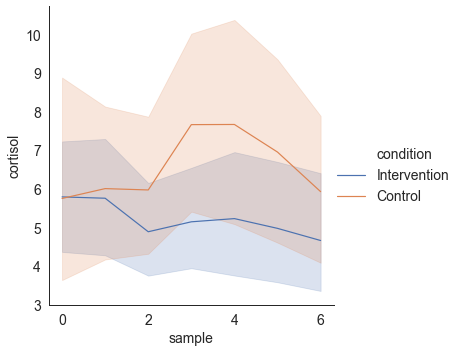

In [11]:
sns.relplot(data=df_cort.reset_index(), x='sample', y='cortisol', kind='line', hue='condition')

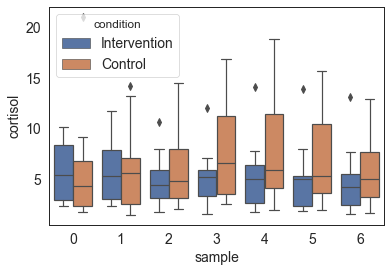

In [12]:
fig, ax = plt.subplots()
sns.boxplot(data=df_cort.reset_index(), x='sample', y='cortisol', hue='condition', ax=ax)

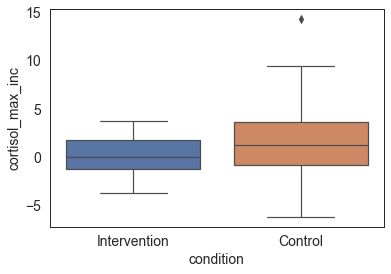

In [13]:
fig, ax = plt.subplots()
sns.boxplot(data=saliva.max_increase(df_cort).reset_index(), x='condition', y='cortisol_max_inc')

biomarker,cortisol_argmax,cortisol_mean,cortisol_std,cortisol_skew,cortisol_kurt
condition,,,,,
Control,2.571429,6.559445,2.230559,0.182843,-0.069801
Intervention,1.285714,5.201515,1.175386,0.019014,-0.688554


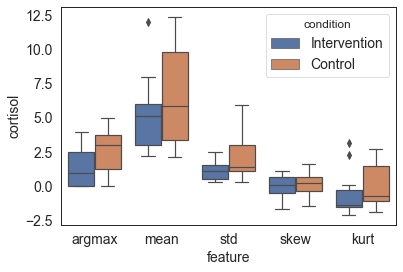

In [14]:
fig, ax = plt.subplots()

display(saliva.standard_features(df_cort).groupby('condition').mean())

data_long = pd.wide_to_long(saliva.standard_features(df_cort).reset_index(), stubnames="cortisol", sep='_', i=['subject', 'condition'], j='feature', suffix=r"\w+")
sns.boxplot(data=data_long.reset_index(), x='feature', y='cortisol', hue='condition', ax=ax);